# Task - 7

## Descriptive Statistics and Python Implementation.
   *** 
`Descriptive statistics` helps to summarize a given data set . 
Descriptive statistics are broken down into measures of `central tendency` and `measures of variability`.
Measures of central tendency include the `mean`, `median`, and `mode`
Measures of variability include `standard deviation`, `variance`, `minimum and maximum variables`, `kurtosis`, and `skewness`.
   ***
* Mean
* Median
* Mode
* Variance
* Standard Deviation
* Correlation
* Normal Distribution (use references)
* Feature of Normal Distribution
* Positively Skewed & Negatively Skewed Normal Distribution
* Effect on Mean, Median and Mode due to Skewness
* Explain QQ Plot and show the implementation of the same
* Explain Box Cox and show the implementation of the same


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

data = pd.read_csv('data.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [3]:
data.tail()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
45,90000,48000,7,0,885600,Post-Graduate,3
46,98000,25000,5,0,1152480,Professional,2
47,100000,30000,6,0,1404000,Graduate,3
48,100000,50000,4,20000,1032000,Professional,2
49,100000,40000,6,10000,1320000,Post-Graduate,1


## Mean 
***
The mean is the `mathematical average` of a set of two or more number.

formula = ` (x1 +x2 +x3 +....+xn / n) `
***

### Implementation
   Lets see the mean(average) income of `Annual_HH_Income`
   

In [4]:
# With function 
data['Annual_HH_Income'].mean()

490019.04

In [5]:
# Without function
x = data['Annual_HH_Income']
c = 0
for i in x:
    c += i
print(c/len(x))

490019.04


## Median
***
The `median` is the middle number in a `sorted` list of numbers and can be `more descriptive` of that data set than the mean(average).
If there is an `odd amount` of numbers, the median value is the number that is in the `middle`.
If there is an `even amount` of numbers , the median value is the `average` of the `middle pair`
***

### Implementation
   Lets see the median(middle value) income of `Annual_HH_Income`

In [6]:
data['Annual_HH_Income'].median()

447420.0

In [7]:
# Without function
def get_median(ls):
    ls_sorted = ls.sort()
    if len(ls) % 2 != 0:
        # total number of values are odd
        m = int((len(ls)+1)/2 - 1)
        return ls[m]
    else:
        m1 = int(len(ls)/2 - 1)
        m2 = int(len(ls)/2)
        return (ls[m1]+ls[m2])/2

x = data['Annual_HH_Income']
y = x.tolist()

print(get_median(y))

447420.0


## Mode
***
The `mode` is the `most commonly observed` value in a set of data. In a Dataset there can be `one` mode , `more than one` mode or `no` mode at all.
***

### Implementation
   Lets see the mode(most common) rent or EMI of `Emi_or_Rent_Amt`

In [8]:
# With function 
data['Emi_or_Rent_Amt'].mode()

0    0
dtype: int64

In [9]:
# Without Function 
def get_Mode(ls):
    L = []
    for i in range(len(ls)):
        L.append(ls.count(ls[i]))
    dict1 = dict(zip(ls,L)) 
    return max(dict1, key= lambda x: dict1[x])

x = data['Emi_or_Rent_Amt'].tolist()
print(get_Mode(x))

0


## Variance
***
The `average` of the `squared differences` from the Mean. This is used to check how `far` the numbers are from the `mean` value.

***

Formula ($\sigma ^2$)  = $$\frac{\sum|x - \mu|^2}{N}$$


### Implementation
   Lets see the varience rent or EMI of `Emi_or_Rent_Amt`

In [10]:
# with function
data['Emi_or_Rent_Amt'].var()

38955510.20408163

In [11]:
# without Function 
x = data['Emi_or_Rent_Amt']
mean_emi = x.sum()/x.count()
variance = 0
for i in range(x.count()):
    variance += (x[i] - mean_emi)**2
print(variance/x.count())

38176400.0


## Standard Deviation
***
Standard deviation is the `square root` of `Variance`.The Standard Deviation is a measure of how spread out numbers are.
***

***
Formula ($\sigma$)  = $$\sqrt{\frac{\sum|x - \mu|^2}{N}}$$
***

Where

$\sigma$ - standard deviation

$\mu$ - mean

N - number of values

### Implementation
   Lets see the mode(most common) rent or EMI of `Emi_or_Rent_Amt`

In [12]:
# with Function 
data['Emi_or_Rent_Amt'].std()

6241.434947516607

In [13]:
# without Function 
x = data['Emi_or_Rent_Amt']
mean_emi = x.sum()/x.count()
variance = 0
for i in range(x.count()):
    variance += (x[i] - mean_emi)**2
print(np.sqrt(variance/x.count()))

6178.705366013175


## Correlation

***
`Correlation coefficients` are used to measure how strong a `relationship` is between two variables.The `coefficient` can take any values from `-1 to 1`.

*   -1: `Perfect negative` correlation. The variables tend to move in `opposite direction`s (i.e., when one variable increases, the other variable decreases).
*    0: `No correlation`. The variables do not have a relationship with each other.
*    1: `Perfect positive correlation`. The variables tend to move in the `same direction` (i.e., when one variable increases, the other variable also increases).

***

Formula (Pearson Correlation Coefficient)  = 
$$\frac{\sum (x - \mu_x) (y - \mu_y)}{\sqrt{\sum (x - \mu_x)^2 \sum (y - \mu_y)^2}}$$

where,
    x = value of x ;
    $\mu_x$ = mean of x ;
    y = value of y ;
    $\mu_y$ = mean of y 

***

### Implementation
   Lets see the correlation between rent or EMI of `Emi_or_Rent_Amt` and income of `Annual_HH_Income`.

In [14]:
# with Function
from scipy.stats import pearsonr
x = data['Emi_or_Rent_Amt'].tolist()
y = data['Annual_HH_Income'].tolist()
corr , _ = pearsonr(x,y)
print(f'The Pearson Correlation between EMI and Income is {"%.4f" % corr} ')

The Pearson Correlation between EMI and Income is 0.0027 


In [15]:
# without Function
x = data['Emi_or_Rent_Amt']
x_mean = x.sum()/x.count()
y = data['Annual_HH_Income']
y_mean = y.sum()/y.count()

sum_tot = 0
sum_x_sq = 0
sum_y_sq = 0

for i in range(x.count()):
    m = (x[i] - x_mean)*(y[i] - y_mean)
    sum_tot += m
    
for i in range(x.count()):
    m = (x[i] - x_mean)**2
    sum_x_sq += m
    
for i in range(y.count()):
    m = (y[i] - y_mean)**2
    sum_y_sq += m
    
corr_wf = (sum_tot) / (np.sqrt((sum_x_sq) * (sum_y_sq)))
print(f'The Pearson Correlation between EMI and Income is {"%.4f" % corr_wf} ')

The Pearson Correlation between EMI and Income is 0.0027 


## Normal Distribution 

***
`Normal distribution` is a probability `distribution plot`. A normal distribution is a `bell curve` or `Gaussian Distribution` which typically has two parameters: `mean` and `standard deviation (SD)`.It represents a symmetric distribution where most of the observations cluster around the `central peak` called as `mean of the distribution`.

***


### Figure of Normal Distribution
<img src = 'https://s4be.cochrane.org/app/uploads/2018/09/Image-1-Standard-deviation-Standard-error--768x555.jpg' width = "400"/>


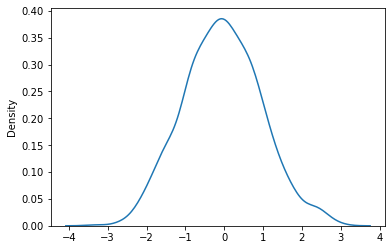

In [16]:
sample = np.random.normal(size=1000)
sns.distplot(sample , hist = False);

## Feature of Normal Distribution 

***
* The mean, median and mode are exactly the same.
* The distribution is symmetric about the mean—half the values fall below the mean and half above the mean.
* he distribution can be described by two values: the mean and the standard deviation.
***


### Normal Distribution with Different Mean
<img src = 'https://cdn.scribbr.com/wp-content/uploads/2020/10/normal-distributions-with-different-means-768x475.png' width = "500"/>

***
### Normal Distribution with Different SD
<img src = 'https://cdn.scribbr.com/wp-content/uploads/2020/10/normal-distributions-with-different-sds-768x475.png' width = "500"/>





## Positively Skewed & Negatively Skewed Normal Distribution 

***

`Skewness` refers to a `distortion or asymmetry` that `deviates` from the symmetrical bell curve, or `normal distribution`, in a set of data.If one tail is `longer than another`, the distribution is `skewed`. These distributions are sometimes called `asymmetric` or `asymmetrical` distributions as they `don’t show any kind of symmetry`.

***
1. If skewness is less than -1 or greater than 1, the distribution is highly skewed.
2. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
3. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

### Positively Skewed Distribution

`Positive Skewness` means when the tail on the `right side` of the distribution is `longer or fatter` than the left side.

<img src = 'https://static.seekingalpha.com/uploads/2014/3/19/10307291-13952474853660543-Buy-and-Hold-Falcon_origin.jpg' width = "500"/>

***

### Negatively Skewed Distribution 

`Negative Skewness` is when the tail on the `left side` of the distribution is `longer or fatter` than the tail on the right side.

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcMrOwRWsy5uSAi7IC3SaH1JTPQWV45R1i9A&usqp=CAU' width = "500"/>

### Implementation
Checking the skewness on `all the columns in the data set`.

In [17]:
data.skew()

Mthly_HH_Income          0.924615
Mthly_HH_Expense         1.199461
No_of_Fly_Members        0.113674
Emi_or_Rent_Amt          3.403680
Annual_HH_Income         1.192949
No_of_Earning_Members    1.593301
dtype: float64

## Effect on Mean, Median and Mode due to Skewness 

***

### Positively Skewed 

The `mean` of positively skewed data `will be greater than the median`. A right-skewed distribution will have the `mean` to the `right of the median`.

<img src = 'https://www.statisticshowto.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg' width = "500"/>

### Negatively Skewed 

The `mean` of negatively skewed data `will be lesser than the median`. A left-skewed distribution will have the `mean` to the `left of the median`.

***

### Explain QQ Plot and show the implementation of the same
 
***
`Q-Q plots` also known as `Quantile-Quantile plot` is plots of two quantiles against each other.The `main objective` of this plot is to check wheather `two sets of data come from the same distribution`. We can simply tell the type of distribution by looking at the graph of Q-Q plot

***

#### Implementation
   Lets see the QQ plot on income of `A`

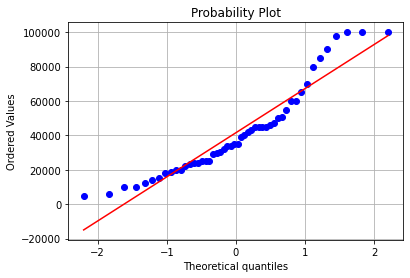

In [18]:
from scipy import stats

stats.probplot(data['Mthly_HH_Income'], dist="norm", plot=plt)

plt.grid()

### Explain Box Cox and show the implementation of the same

***
A `box-cox plot` is basically used to `convert` the `non-normally` distributed dataset into the `normally` distributed dataset.
***

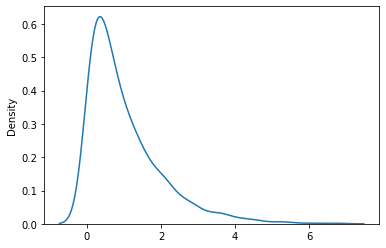

In [19]:
from scipy.stats import boxcox 

data = np.random.exponential(size=1000)

sns.distplot(data, hist=False, kde=True);

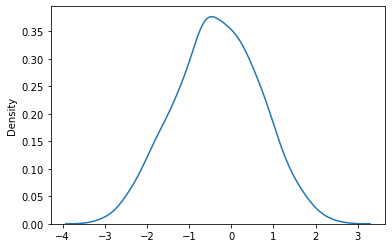

In [20]:
# converting the data to normally distributed
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False, kde=True); 